# Atividade Basica

Passeio aleatório (implementação básica). Considere um passeio aleatório unidimensional, onde a cada instante de tempo o caminhante dá um passo uma unidade para a direita ou para a esquerda com probabilidades p e 1 − p , respectivamente. O passeio termina depois de N = 1000 passos. Faça um gráfico da posição do caminhante em função do número de passos (que representa o tempo). Use p = 0.5 e p = 0.8 . Implemente na forma de uma função que receba como argumento o número de passos N e a probabilidade p , e retorne um array com a posição do caminhante em cada passo.

In [137]:
import numpy as np
import matplotlib.pyplot as plt


def random_walk(n,p):
    
    rng = np.random.default_rng()

    lista = rng.choice(a=[-1,1],size=n,p=[1-p, p])
    caminho = np.cumsum(lista)
    tempo = np.arange(0,n,1)
    return caminho, tempo




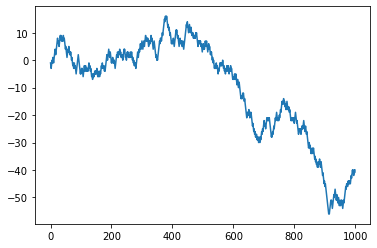

In [138]:

y,x = random_walk(1000,0.5)
plt.plot(x,y)

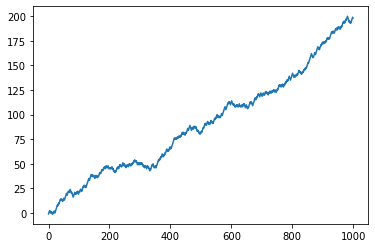

In [139]:

y,x = random_walk(1000,0.6)

plt.plot(x,y)

Passeio aleatório (repetição). Rode o código acima 100 vezes para um valor fixo p e faça o gráfico conjunto de todos os passeios. Use p = 0.5 e p = 0.8 . O que observa?

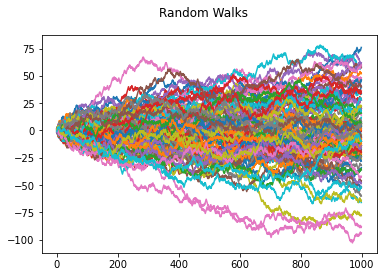

In [140]:
fig , ax = plt.subplots()
for i in range(100):
    y,x = random_walk(1000,0.5)
    ax.plot(x,y)
fig.suptitle('Random Walks')
plt.show()

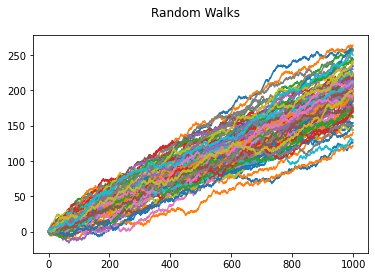

In [141]:
fig , ax = plt.subplots()
for i in range(100):
    y,x = random_walk(1000,0.6)
    ax.plot(x,y)
fig.suptitle('Random Walks')
plt.show()

# Atividade Intermediaria

Passeio aleatório (médias). Calcule a média e o desvio padrão da posição do caminhante em função do número de passos. Faça um gráfico da média e do desvio padrão em função dos passos. Use p = 0.5 e p = 0.8 .

In [162]:
import numpy as np
def desvio(X):

    m = len(X)
    x = np.median(X ,axis=0)
    deltax = []
    for i in range(m):
        deltax.append((x-X[i])**2)
    desvio = (np.sum(deltax,axis=0)/(m-1))**(1/2)
    
    return np.array(desvio) , np.array(x)



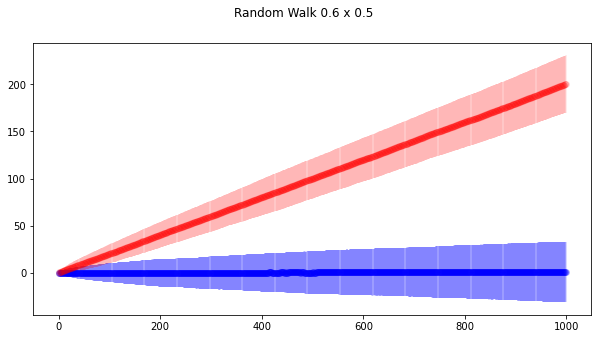

In [181]:

Y1 = []
Y2 = []

x = np.arange(0,1000,1)
for i in range(1000):
    y2 , _ = random_walk(1000,0.6)
    Y2.append(y2)

for i in range(1000):
    y1 , _ = random_walk(1000,0.5)
    Y1.append(y1)


#desvioy2 , y2 = desvio(Y2)

#desvioy1 , y1 = desvio(Y1)
desvioy1 = np.std(Y1,axis=0)
desvioy2 = np.std(Y2,axis=0)
y1 = np.mean(Y1,axis=0)
y2 = np.mean(Y2,axis=0)


fig3 , ax3 = plt.subplots(figsize=(10,5))

ax3.errorbar(x=x,y=y1,yerr=desvioy1,xerr=0,alpha=0.2,fmt='o',color ='Blue')

ax3.errorbar(x=x,y=y2,yerr=desvioy2,xerr=0,alpha=0.1,fmt='o',color ='Red')

fig3.suptitle('Random Walk 0.6 x 0.5')
plt.show()

Passeio aleatório (histograma 1). Usando os dados do exercício 2, faça histogramas da posição do caminhante no inicio, no meio e no final do passeio. Plote os 3 histogramas no mesmo gráfico. Veja se o resultado condiz com o observado no exercício 2.

ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 2 colors were provided

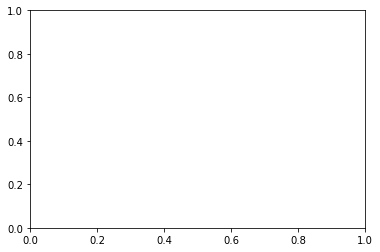

In [ ]:
fig3 , ax3 = plt.subplots()


colors = ['red', 'blue']
labels = ['0.5', '0.6']
n_bins = 1
ax3.hist(x, n_bins, density=True, histtype='bar', color=colors, label=labels)
ax3.legend(prop={'size': 10})
ax3.set_title('histograma')


# Atividade avançada

Passeio aleatório (histograma). Usando os dados do exercício 2, faça um histograma da posição do caminhante em cada passo. Faça um gráfico de mapa de cores da evolução do histograma usando plt.imshow, plt.pcolormesh, ou tente fazer gráficos 3D. Se optar por fazer gráficos 3D, recomendo usar a biblioteca plotly, pois gráficos 3D no matplotlib não ficam bons.

In [145]:
import plotly.graph_objects as go
Y= []
for i in range(10):
    y,x= random_walk(100,0.6)
    Y.append(y)
Y= np.array(Y)
print(len(Y))
Y2 = np.(Y)
print(len(Y2))

import plotly.graph_objects as go
import numpy as np

# Create figure
#fig = go.Figure(data=[go.Surface(z=Z1)])
fig = go.Figure()

# Add traces, one for each slider step
for step in range(len(Y[0])):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="𝜈 = " + str(step),
            x = x,
            y = np.traspose(Y)
        )
    )

# Make 10th trace visible
fig.data[len(Y)].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()


SyntaxError: invalid syntax (2211039991.py, line 8)

In [ ]:
import plotly.graph_objects as go
Z= []
for i in range(100):
    x = random_walk(1000,0.6)
    Z.append(x)

#fig = go.Figure(data=[go.Surface(z=Z1)])
#fig.show()